Cosine Similarity: 0.998
Angle between vectors: 3.26°


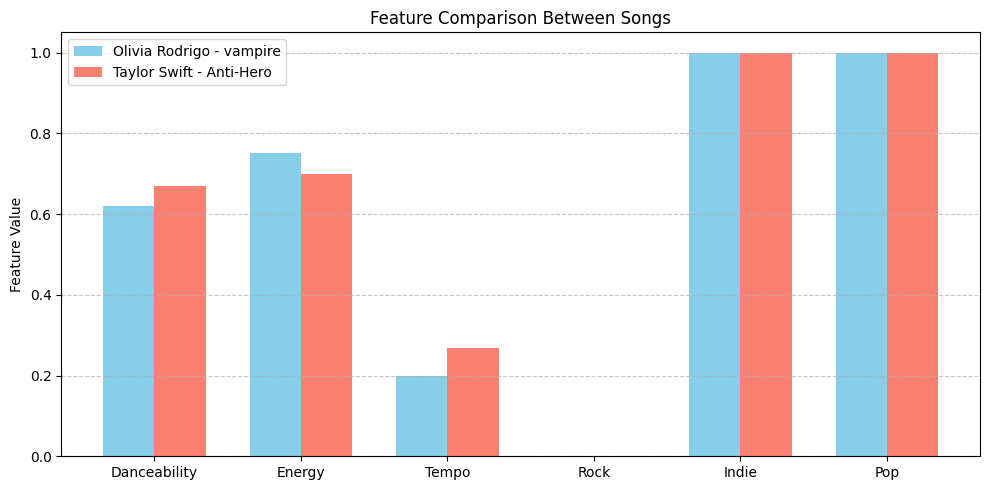

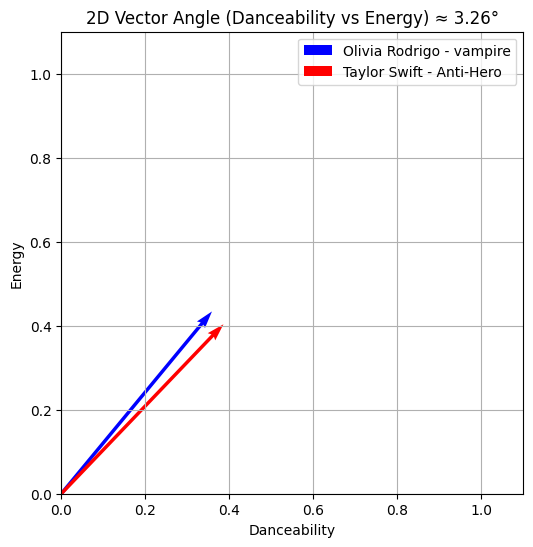

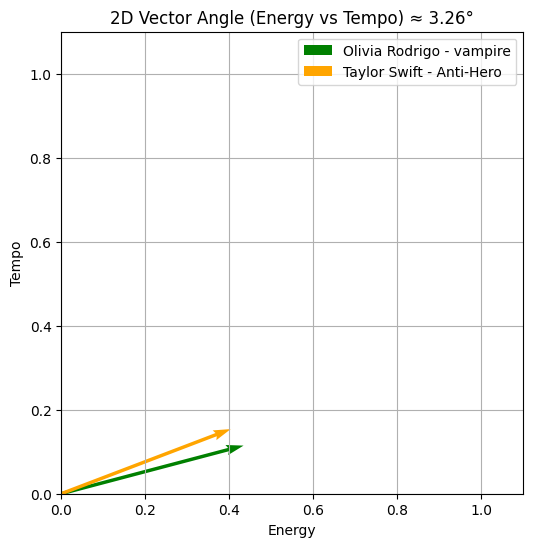

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

# Load data from CSV
filename = 'data.csv'

artists = []
titles = []
features = []  # list of lists: each song's [Danceability, Energy, Tempo, Genre_Rock, Genre_Indie, Genre_Pop]

with open(filename, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        artists.append(row['Artist'])
        titles.append(row['Title'])
        features.append([
            float(row['Danceability']),
            float(row['Energy']),
            float(row['Tempo']),
            int(row['Genre_Rock']),
            int(row['Genre_Indie']),
            int(row['Genre_Pop'])
        ])

features = np.array(features)

# Select any two songs for comparison — here, index 0 and 1
song_a = features[0]
song_b = features[3]
label_a = f"{artists[0]} - {titles[0]}"
label_b = f"{artists[3]} - {titles[3]}"

# Normalize for cosine similarity
song_a_norm = normalize([song_a])[0]
song_b_norm = normalize([song_b])[0]

# Cosine similarity
similarity = cosine_similarity([song_a], [song_b])[0][0]
angle_rad = np.arccos(similarity)
angle_deg = np.degrees(angle_rad)

print(f"Cosine Similarity: {similarity:.3f}")
print(f"Angle between vectors: {angle_deg:.2f}°")

# --- Bar plot for feature comparison ---
feature_labels = ['Danceability', 'Energy', 'Tempo', 'Rock', 'Indie', 'Pop']
x = np.arange(len(feature_labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, song_a, width, label=label_a, color='skyblue')
plt.bar(x + width/2, song_b, width, label=label_b, color='salmon')

plt.xticks(x, feature_labels)
plt.ylabel("Feature Value")
plt.title("Feature Comparison Between Songs")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2D vector comparison: Danceability vs Energy ---
a_2d = song_a_norm[:2]
b_2d = song_b_norm[:2]

plt.figure(figsize=(6, 6))
plt.quiver(0, 0, a_2d[0], a_2d[1], angles='xy', scale_units='xy', scale=1, color='blue', label=label_a)
plt.quiver(0, 0, b_2d[0], b_2d[1], angles='xy', scale_units='xy', scale=1, color='red', label=label_b)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.title(f"2D Vector Angle (Danceability vs Energy) ≈ {angle_deg:.2f}°")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

# --- 2D vector comparison: Energy vs Tempo ---
a_2d = song_a_norm[[1, 2]]  # Energy and Tempo
b_2d = song_b_norm[[1, 2]]

plt.figure(figsize=(6, 6))
plt.quiver(0, 0, a_2d[0], a_2d[1], angles='xy', scale_units='xy', scale=1, color='green', label=label_a)
plt.quiver(0, 0, b_2d[0], b_2d[1], angles='xy', scale_units='xy', scale=1, color='orange', label=label_b)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.title(f"2D Vector Angle (Energy vs Tempo) ≈ {angle_deg:.2f}°")
plt.legend()
plt.show()


